In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from matplotlib import pyplot as plt

In [2]:
spark = SparkSession.builder.getOrCreate()

d:\BINUS\BLUEJACK_nar\04. Post Training\29. Big Data Processing\Materi\PTSpark\.venv\lib\site-packages\pyspark\context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


In [3]:
# Import Data
df_train = spark.read.csv('./Clustering/Clustering.csv', header=True, inferSchema=True)

# Selecting Features & Label Col
df_train = df_train.select('Trash Pollution', 'Bacteria Level', "Algae Concentration")

# Filter NA data
df_train.show()

+---------------+--------------+-------------------+
|Trash Pollution|Bacteria Level|Algae Concentration|
+---------------+--------------+-------------------+
|            Low|           207|               6.05|
|           High|           133|               4.21|
|         Medium|            84|               8.07|
|           null|           276|               6.53|
|            Low|           126|               1.73|
|           High|           308|              10.51|
|         Medium|           181|               7.27|
|            Low|            64|               2.01|
|         Medium|            92|               1.15|
|           High|           270|               9.88|
|         Medium|           275|               6.54|
|            Low|           198|               4.12|
|         Medium|            54|               1.64|
|            Low|            55|               4.11|
|            Low|           166|               4.04|
|         Medium|           275|              

- never = 0
- ever = 1
- No Info = 2
- not current = 3
- former = 4
- current = 5

In [4]:
df_train = df_train.withColumn("Trash Pollution", 
                                   when(df_train["Trash Pollution"] == "Low", 0)
                                   .when(df_train["Trash Pollution"] == "Medium", 1)
                                   .when(df_train["Trash Pollution"] == "High", 2))

df_train.show()

+---------------+--------------+-------------------+
|Trash Pollution|Bacteria Level|Algae Concentration|
+---------------+--------------+-------------------+
|              0|           207|               6.05|
|              2|           133|               4.21|
|              1|            84|               8.07|
|           null|           276|               6.53|
|              0|           126|               1.73|
|              2|           308|              10.51|
|              1|           181|               7.27|
|              0|            64|               2.01|
|              1|            92|               1.15|
|              2|           270|               9.88|
|              1|           275|               6.54|
|              0|           198|               4.12|
|              1|            54|               1.64|
|              0|            55|               4.11|
|              0|           166|               4.04|
|              1|           275|              

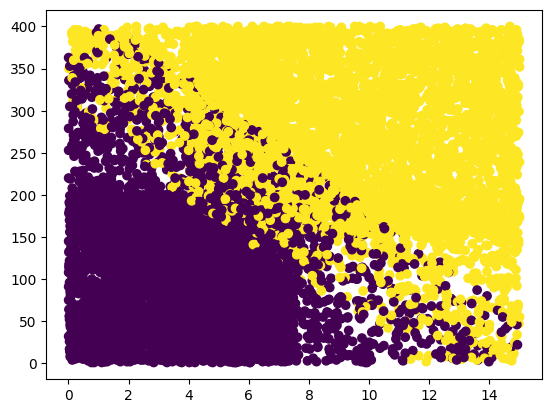

In [5]:
# Normalization
df_train = df_train.na.drop()

cols = df_train.columns

df_train = VectorAssembler(inputCols=cols, outputCol="VectorOut").transform(df_train)
df_train = StandardScaler(inputCol="VectorOut", outputCol="features").fit(df_train)\
                                                                        .transform(df_train)
model = KMeans().setK(2)
predictResult = model.fit(df_train).transform(df_train)

pandasData = predictResult.toPandas()

plt.scatter(pandasData['Algae Concentration'], pandasData['Bacteria Level'], c=pandasData['prediction'])
plt.show()